# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.015907413268831515


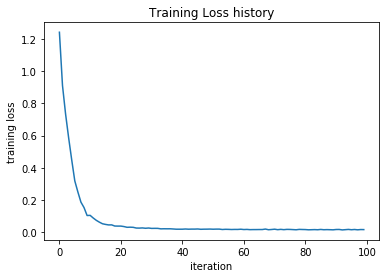

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302947
iteration 100 / 1000: loss 2.302567
iteration 200 / 1000: loss 2.298760
iteration 300 / 1000: loss 2.268560
iteration 400 / 1000: loss 2.199928
iteration 500 / 1000: loss 2.158799
iteration 600 / 1000: loss 2.016205
iteration 700 / 1000: loss 2.052226
iteration 800 / 1000: loss 1.962296
iteration 900 / 1000: loss 2.086446
Validation accuracy:  0.283


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

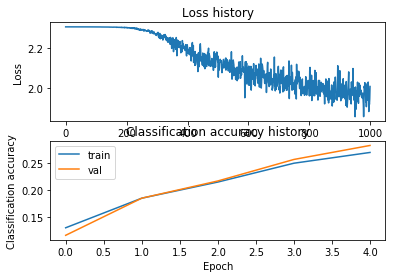

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

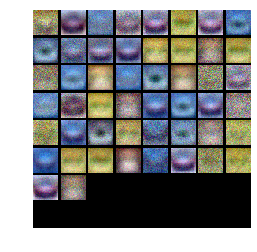

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$调节四个超参：学习率、隐藏层个数、batch_size、dropout。利用网格搜索，以最大化验证集准确率为准则，确定最优参数，并记录最优情况下的超参与模型。

********************************************************************************
Now iter 1/16
learning_rate:0.001000; hiden_size:50; batch_size:128; dropout:0.300000
iteration 0 / 2000: loss 2.302938
iteration 100 / 2000: loss 2.062683
iteration 200 / 2000: loss 1.842659
iteration 300 / 2000: loss 1.719374
iteration 400 / 2000: loss 1.809287
iteration 500 / 2000: loss 1.889308
iteration 600 / 2000: loss 1.658279
iteration 700 / 2000: loss 1.696817
iteration 800 / 2000: loss 1.798027
iteration 900 / 2000: loss 1.560763
iteration 1000 / 2000: loss 1.619562
iteration 1100 / 2000: loss 1.754269
iteration 1200 / 2000: loss 1.785314
iteration 1300 / 2000: loss 1.701401
iteration 1400 / 2000: loss 1.604870
iteration 1500 / 2000: loss 1.814600
iteration 1600 / 2000: loss 1.689879
iteration 1700 / 2000: loss 1.609845
iteration 1800 / 2000: loss 1.726806
iteration 1900 / 2000: loss 1.668543
Validation accuracy:  0.459


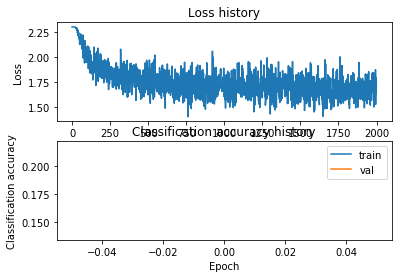

[0.21875]
[0.138]
********************************************************************************
Now iter 2/16
learning_rate:0.001000; hiden_size:50; batch_size:128; dropout:0.000000
iteration 0 / 2000: loss 2.302979
iteration 100 / 2000: loss 1.952754
iteration 200 / 2000: loss 1.823464
iteration 300 / 2000: loss 1.705288
iteration 400 / 2000: loss 1.811814
iteration 500 / 2000: loss 1.712320
iteration 600 / 2000: loss 1.503963
iteration 700 / 2000: loss 1.684724
iteration 800 / 2000: loss 1.500207
iteration 900 / 2000: loss 1.541063
iteration 1000 / 2000: loss 1.446544
iteration 1100 / 2000: loss 1.562124
iteration 1200 / 2000: loss 1.540449
iteration 1300 / 2000: loss 1.623563
iteration 1400 / 2000: loss 1.466897
iteration 1500 / 2000: loss 1.454821
iteration 1600 / 2000: loss 1.452480
iteration 1700 / 2000: loss 1.506881
iteration 1800 / 2000: loss 1.515299
iteration 1900 / 2000: loss 1.609791
Validation accuracy:  0.49


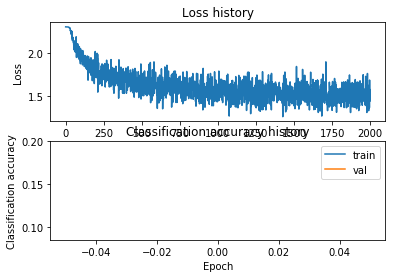

[0.1953125]
[0.09]
********************************************************************************
Now iter 3/16
learning_rate:0.001000; hiden_size:50; batch_size:256; dropout:0.300000
iteration 0 / 2000: loss 2.302961
iteration 100 / 2000: loss 1.943699
iteration 200 / 2000: loss 1.857764
iteration 300 / 2000: loss 1.939607
iteration 400 / 2000: loss 1.824152
iteration 500 / 2000: loss 1.744298
iteration 600 / 2000: loss 1.662449
iteration 700 / 2000: loss 1.780472
iteration 800 / 2000: loss 1.763163
iteration 900 / 2000: loss 1.712150
iteration 1000 / 2000: loss 1.711630
iteration 1100 / 2000: loss 1.613364
iteration 1200 / 2000: loss 1.607426
iteration 1300 / 2000: loss 1.815181
iteration 1400 / 2000: loss 1.664052
iteration 1500 / 2000: loss 1.612146
iteration 1600 / 2000: loss 1.636993
iteration 1700 / 2000: loss 1.794348
iteration 1800 / 2000: loss 1.568434
iteration 1900 / 2000: loss 1.851367
Validation accuracy:  0.464


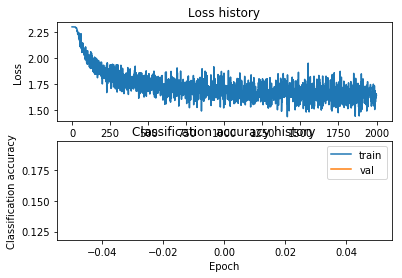

[0.1953125]
[0.122]
********************************************************************************
Now iter 4/16
learning_rate:0.001000; hiden_size:50; batch_size:256; dropout:0.000000
iteration 0 / 2000: loss 2.302968
iteration 100 / 2000: loss 1.961466
iteration 200 / 2000: loss 1.800216
iteration 300 / 2000: loss 1.669203
iteration 400 / 2000: loss 1.726065
iteration 500 / 2000: loss 1.501700
iteration 600 / 2000: loss 1.476018
iteration 700 / 2000: loss 1.569559
iteration 800 / 2000: loss 1.530914
iteration 900 / 2000: loss 1.363975
iteration 1000 / 2000: loss 1.461484
iteration 1100 / 2000: loss 1.534058
iteration 1200 / 2000: loss 1.520362
iteration 1300 / 2000: loss 1.447176
iteration 1400 / 2000: loss 1.417345
iteration 1500 / 2000: loss 1.438172
iteration 1600 / 2000: loss 1.410642
iteration 1700 / 2000: loss 1.415940
iteration 1800 / 2000: loss 1.411048
iteration 1900 / 2000: loss 1.558111
Validation accuracy:  0.477


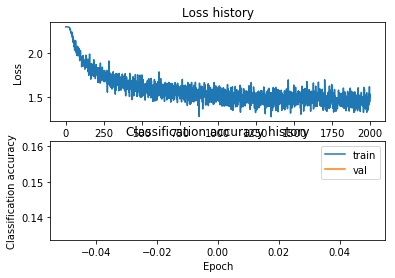

[0.16015625]
[0.135]
********************************************************************************
Now iter 5/16
learning_rate:0.001000; hiden_size:150; batch_size:128; dropout:0.300000
iteration 0 / 2000: loss 2.303730
iteration 100 / 2000: loss 1.967074
iteration 200 / 2000: loss 1.817445
iteration 300 / 2000: loss 1.893280
iteration 400 / 2000: loss 1.568213
iteration 500 / 2000: loss 1.534692
iteration 600 / 2000: loss 1.596243
iteration 700 / 2000: loss 1.655970
iteration 800 / 2000: loss 1.677250
iteration 900 / 2000: loss 1.753027
iteration 1000 / 2000: loss 1.562894
iteration 1100 / 2000: loss 1.619808
iteration 1200 / 2000: loss 1.734987
iteration 1300 / 2000: loss 1.651508
iteration 1400 / 2000: loss 1.675724
iteration 1500 / 2000: loss 1.742822
iteration 1600 / 2000: loss 1.732285
iteration 1700 / 2000: loss 1.738222
iteration 1800 / 2000: loss 1.659079
iteration 1900 / 2000: loss 1.562985
Validation accuracy:  0.489


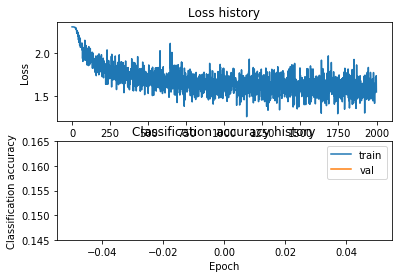

[0.1640625]
[0.146]
********************************************************************************
Now iter 6/16
learning_rate:0.001000; hiden_size:150; batch_size:128; dropout:0.000000
iteration 0 / 2000: loss 2.303789
iteration 100 / 2000: loss 1.881855
iteration 200 / 2000: loss 1.782744
iteration 300 / 2000: loss 1.862113
iteration 400 / 2000: loss 1.579787
iteration 500 / 2000: loss 1.604579
iteration 600 / 2000: loss 1.519611
iteration 700 / 2000: loss 1.554865
iteration 800 / 2000: loss 1.504041
iteration 900 / 2000: loss 1.413478
iteration 1000 / 2000: loss 1.404587
iteration 1100 / 2000: loss 1.494731
iteration 1200 / 2000: loss 1.590274
iteration 1300 / 2000: loss 1.525545
iteration 1400 / 2000: loss 1.439844
iteration 1500 / 2000: loss 1.343285
iteration 1600 / 2000: loss 1.482206
iteration 1700 / 2000: loss 1.465639
iteration 1800 / 2000: loss 1.357110
iteration 1900 / 2000: loss 1.296093
Validation accuracy:  0.499


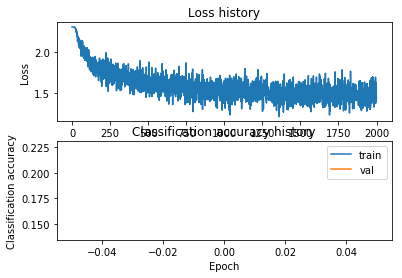

[0.2265625]
[0.139]
********************************************************************************
Now iter 7/16
learning_rate:0.001000; hiden_size:150; batch_size:256; dropout:0.300000
iteration 0 / 2000: loss 2.303707
iteration 100 / 2000: loss 1.977097
iteration 200 / 2000: loss 1.939463
iteration 300 / 2000: loss 1.757723
iteration 400 / 2000: loss 1.673600
iteration 500 / 2000: loss 1.681654
iteration 600 / 2000: loss 1.675587
iteration 700 / 2000: loss 1.604826
iteration 800 / 2000: loss 1.549714
iteration 900 / 2000: loss 1.454720
iteration 1000 / 2000: loss 1.575109
iteration 1100 / 2000: loss 1.540431
iteration 1200 / 2000: loss 1.702671
iteration 1300 / 2000: loss 1.638325
iteration 1400 / 2000: loss 1.591570
iteration 1500 / 2000: loss 1.507481
iteration 1600 / 2000: loss 1.526889
iteration 1700 / 2000: loss 1.663673
iteration 1800 / 2000: loss 1.533860
iteration 1900 / 2000: loss 1.458158
Validation accuracy:  0.494


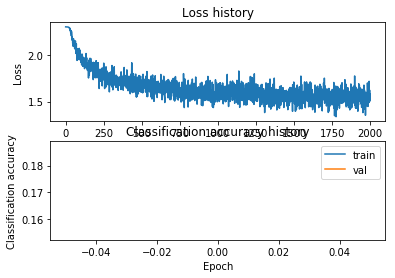

[0.1875]
[0.154]
********************************************************************************
Now iter 8/16
learning_rate:0.001000; hiden_size:150; batch_size:256; dropout:0.000000
iteration 0 / 2000: loss 2.303812
iteration 100 / 2000: loss 1.918786
iteration 200 / 2000: loss 1.805530
iteration 300 / 2000: loss 1.704701
iteration 400 / 2000: loss 1.557061
iteration 500 / 2000: loss 1.499718
iteration 600 / 2000: loss 1.521307
iteration 700 / 2000: loss 1.578673
iteration 800 / 2000: loss 1.449471
iteration 900 / 2000: loss 1.509218
iteration 1000 / 2000: loss 1.485967
iteration 1100 / 2000: loss 1.472673
iteration 1200 / 2000: loss 1.374001
iteration 1300 / 2000: loss 1.444450
iteration 1400 / 2000: loss 1.423782
iteration 1500 / 2000: loss 1.394281
iteration 1600 / 2000: loss 1.315560
iteration 1700 / 2000: loss 1.433326
iteration 1800 / 2000: loss 1.461426
iteration 1900 / 2000: loss 1.392577
Validation accuracy:  0.507


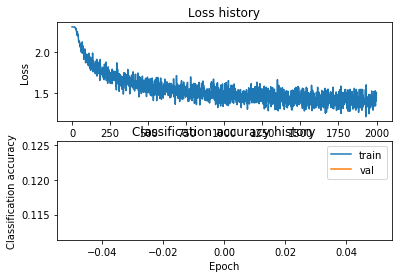

[0.125]
[0.112]
********************************************************************************
Now iter 9/16
learning_rate:0.000500; hiden_size:50; batch_size:128; dropout:0.300000
iteration 0 / 2000: loss 2.302948
iteration 100 / 2000: loss 2.194160
iteration 200 / 2000: loss 2.033754
iteration 300 / 2000: loss 1.990679
iteration 400 / 2000: loss 1.806994
iteration 500 / 2000: loss 1.890143
iteration 600 / 2000: loss 1.872643
iteration 700 / 2000: loss 1.792174
iteration 800 / 2000: loss 1.687656
iteration 900 / 2000: loss 1.558426
iteration 1000 / 2000: loss 1.693294
iteration 1100 / 2000: loss 1.887055
iteration 1200 / 2000: loss 1.818583
iteration 1300 / 2000: loss 1.685055
iteration 1400 / 2000: loss 1.668584
iteration 1500 / 2000: loss 1.700533
iteration 1600 / 2000: loss 1.646011
iteration 1700 / 2000: loss 1.662532
iteration 1800 / 2000: loss 1.796536
iteration 1900 / 2000: loss 1.753717
Validation accuracy:  0.461


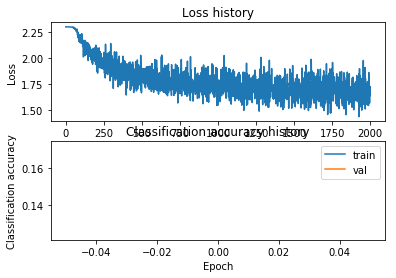

[0.171875]
[0.124]
********************************************************************************
Now iter 10/16
learning_rate:0.000500; hiden_size:50; batch_size:128; dropout:0.000000
iteration 0 / 2000: loss 2.302969
iteration 100 / 2000: loss 2.148437
iteration 200 / 2000: loss 1.921276
iteration 300 / 2000: loss 1.780277
iteration 400 / 2000: loss 1.785703
iteration 500 / 2000: loss 1.775565
iteration 600 / 2000: loss 1.632109
iteration 700 / 2000: loss 1.683051
iteration 800 / 2000: loss 1.701167
iteration 900 / 2000: loss 1.481807
iteration 1000 / 2000: loss 1.680042
iteration 1100 / 2000: loss 1.674100
iteration 1200 / 2000: loss 1.675495
iteration 1300 / 2000: loss 1.391988
iteration 1400 / 2000: loss 1.494714
iteration 1500 / 2000: loss 1.710949
iteration 1600 / 2000: loss 1.638565
iteration 1700 / 2000: loss 1.667207
iteration 1800 / 2000: loss 1.650468
iteration 1900 / 2000: loss 1.477113
Validation accuracy:  0.473


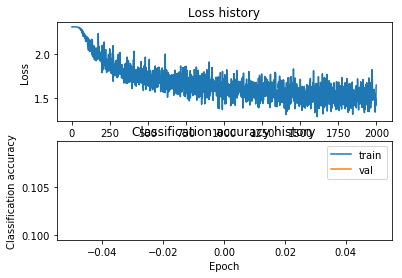

[0.109375]
[0.1]
********************************************************************************
Now iter 11/16
learning_rate:0.000500; hiden_size:50; batch_size:256; dropout:0.300000
iteration 0 / 2000: loss 2.302974
iteration 100 / 2000: loss 2.177993
iteration 200 / 2000: loss 1.990873
iteration 300 / 2000: loss 1.969055
iteration 400 / 2000: loss 1.937679
iteration 500 / 2000: loss 1.741614
iteration 600 / 2000: loss 1.847675
iteration 700 / 2000: loss 1.764798
iteration 800 / 2000: loss 1.669107
iteration 900 / 2000: loss 1.741332
iteration 1000 / 2000: loss 1.695719
iteration 1100 / 2000: loss 1.815837
iteration 1200 / 2000: loss 1.674695
iteration 1300 / 2000: loss 1.800681
iteration 1400 / 2000: loss 1.746907
iteration 1500 / 2000: loss 1.705709
iteration 1600 / 2000: loss 1.687173
iteration 1700 / 2000: loss 1.544240
iteration 1800 / 2000: loss 1.801631
iteration 1900 / 2000: loss 1.627059
Validation accuracy:  0.465


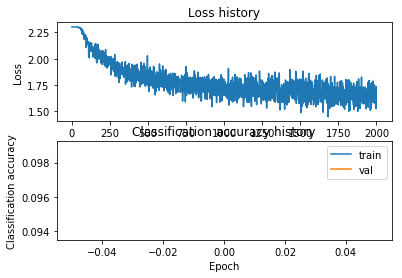

[0.09375]
[0.099]
********************************************************************************
Now iter 12/16
learning_rate:0.000500; hiden_size:50; batch_size:256; dropout:0.000000
iteration 0 / 2000: loss 2.303002
iteration 100 / 2000: loss 2.131411
iteration 200 / 2000: loss 1.904949
iteration 300 / 2000: loss 1.859463
iteration 400 / 2000: loss 1.741542
iteration 500 / 2000: loss 1.740182
iteration 600 / 2000: loss 1.651696
iteration 700 / 2000: loss 1.612068
iteration 800 / 2000: loss 1.649380
iteration 900 / 2000: loss 1.605203
iteration 1000 / 2000: loss 1.588935
iteration 1100 / 2000: loss 1.568288
iteration 1200 / 2000: loss 1.503789
iteration 1300 / 2000: loss 1.553566
iteration 1400 / 2000: loss 1.653350
iteration 1500 / 2000: loss 1.591750
iteration 1600 / 2000: loss 1.430131
iteration 1700 / 2000: loss 1.404928
iteration 1800 / 2000: loss 1.497674
iteration 1900 / 2000: loss 1.551394
Validation accuracy:  0.482


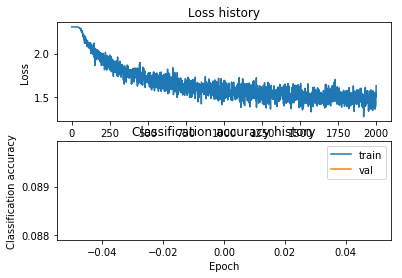

[0.08984375]
[0.088]
********************************************************************************
Now iter 13/16
learning_rate:0.000500; hiden_size:150; batch_size:128; dropout:0.300000
iteration 0 / 2000: loss 2.303753
iteration 100 / 2000: loss 2.152068
iteration 200 / 2000: loss 1.964386
iteration 300 / 2000: loss 1.856613
iteration 400 / 2000: loss 1.893404
iteration 500 / 2000: loss 1.835640
iteration 600 / 2000: loss 1.724343
iteration 700 / 2000: loss 1.717867
iteration 800 / 2000: loss 1.615726
iteration 900 / 2000: loss 1.707613
iteration 1000 / 2000: loss 1.806542
iteration 1100 / 2000: loss 1.664853
iteration 1200 / 2000: loss 1.652816
iteration 1300 / 2000: loss 1.705965
iteration 1400 / 2000: loss 1.682258
iteration 1500 / 2000: loss 1.549213
iteration 1600 / 2000: loss 1.685441
iteration 1700 / 2000: loss 1.609605
iteration 1800 / 2000: loss 1.660724
iteration 1900 / 2000: loss 1.564029
Validation accuracy:  0.474


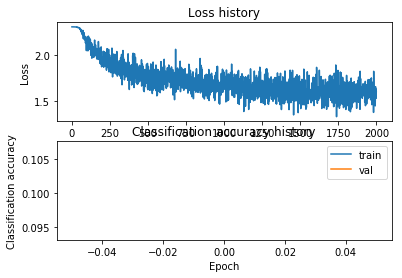

[0.09375]
[0.107]
********************************************************************************
Now iter 14/16
learning_rate:0.000500; hiden_size:150; batch_size:128; dropout:0.000000
iteration 0 / 2000: loss 2.303736
iteration 100 / 2000: loss 2.125270
iteration 200 / 2000: loss 1.924417
iteration 300 / 2000: loss 1.759161
iteration 400 / 2000: loss 1.820332
iteration 500 / 2000: loss 1.714459
iteration 600 / 2000: loss 1.730190
iteration 700 / 2000: loss 1.738186
iteration 800 / 2000: loss 1.640347
iteration 900 / 2000: loss 1.609294
iteration 1000 / 2000: loss 1.511574
iteration 1100 / 2000: loss 1.702221
iteration 1200 / 2000: loss 1.558019
iteration 1300 / 2000: loss 1.539440
iteration 1400 / 2000: loss 1.535700
iteration 1500 / 2000: loss 1.485955
iteration 1600 / 2000: loss 1.403782
iteration 1700 / 2000: loss 1.459137
iteration 1800 / 2000: loss 1.412072
iteration 1900 / 2000: loss 1.398299
Validation accuracy:  0.489


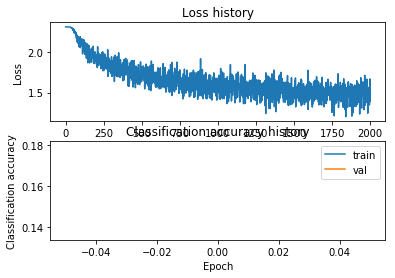

[0.1796875]
[0.136]
********************************************************************************
Now iter 15/16
learning_rate:0.000500; hiden_size:150; batch_size:256; dropout:0.300000
iteration 0 / 2000: loss 2.303731
iteration 100 / 2000: loss 2.147065
iteration 200 / 2000: loss 1.920531
iteration 300 / 2000: loss 1.891806
iteration 400 / 2000: loss 1.745546
iteration 500 / 2000: loss 1.839138
iteration 600 / 2000: loss 1.701897
iteration 700 / 2000: loss 1.716749
iteration 800 / 2000: loss 1.688874
iteration 900 / 2000: loss 1.672284
iteration 1000 / 2000: loss 1.652991
iteration 1100 / 2000: loss 1.562999
iteration 1200 / 2000: loss 1.740466
iteration 1300 / 2000: loss 1.622300
iteration 1400 / 2000: loss 1.532391
iteration 1500 / 2000: loss 1.639680
iteration 1600 / 2000: loss 1.510402
iteration 1700 / 2000: loss 1.510759
iteration 1800 / 2000: loss 1.593251
iteration 1900 / 2000: loss 1.531795
Validation accuracy:  0.485


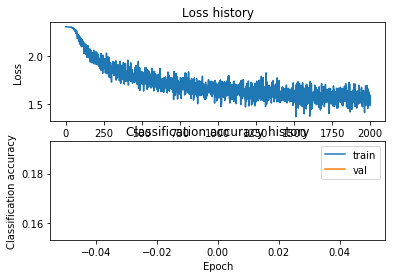

[0.19140625]
[0.155]
********************************************************************************
Now iter 16/16
learning_rate:0.000500; hiden_size:150; batch_size:256; dropout:0.000000
iteration 0 / 2000: loss 2.303746
iteration 100 / 2000: loss 2.124755
iteration 200 / 2000: loss 1.967543
iteration 300 / 2000: loss 1.750708
iteration 400 / 2000: loss 1.782448
iteration 500 / 2000: loss 1.677680
iteration 600 / 2000: loss 1.683385
iteration 700 / 2000: loss 1.684734
iteration 800 / 2000: loss 1.656127
iteration 900 / 2000: loss 1.704542
iteration 1000 / 2000: loss 1.583927
iteration 1100 / 2000: loss 1.545962
iteration 1200 / 2000: loss 1.535749
iteration 1300 / 2000: loss 1.469752
iteration 1400 / 2000: loss 1.561816
iteration 1500 / 2000: loss 1.522676
iteration 1600 / 2000: loss 1.444646
iteration 1700 / 2000: loss 1.511203
iteration 1800 / 2000: loss 1.416950
iteration 1900 / 2000: loss 1.365492
Validation accuracy:  0.487


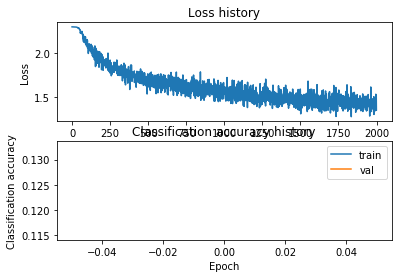

[0.1328125]
[0.115]


In [41]:
best_net = None # store the best model into this 
best_val_acc=0
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

learning_rate_array=[1e-3,5e-4]
hidden_size_array=[50,150]
batch_size_array=[128,256]
dropout_array=[0.3,0]
total_times=len(learning_rate_array)*len(hidden_size_array)*len(batch_size_array)*len(dropout_array)

tuning_parameter_dicts={}


now_iter=0
for learning_rate in learning_rate_array:
    for hidden_size in hidden_size_array:
        for batch_size in batch_size_array:
            for dropout in dropout_array:
                
                now_iter+=1
                print('********************************************************************************')
                print('Now iter %d/%d'%(now_iter,total_times))
                print('learning_rate:%f; hiden_size:%d; batch_size:%d; dropout:%f'%(learning_rate,hidden_size,batch_size,dropout))
                

                input_size = 32 * 32 * 3
                num_classes = 10
                net = TwoLayerNet(input_size, hidden_size, num_classes)

                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=2000, batch_size=batch_size,
                            learning_rate=learning_rate, learning_rate_decay=0.95,
                            reg=0.25, verbose=True,dropout=dropout)

                # Predict on the validation set
                val_acc = (net.predict(X_val) == y_val).mean()
                print('Validation accuracy: ', val_acc)
                

                # Plot the loss function and train / validation accuracies
                plt.subplot(2, 1, 1)
                plt.plot(stats['loss_history'])
                plt.title('Loss history')
                plt.xlabel('Iteration')
                plt.ylabel('Loss')

                plt.subplot(2, 1, 2)
                plt.plot(stats['train_acc_history'], label='train')
                plt.plot(stats['val_acc_history'], label='val')
                plt.title('Classification accuracy history')
                plt.xlabel('Epoch')
                plt.ylabel('Classification accuracy')
                plt.legend()
                plt.show()

                print(stats['train_acc_history'])
                print(stats['val_acc_history'])
                
                tuning_parameter_dicts[(learning_rate,hidden_size,batch_size,dropout)]=val_acc
                
                if val_acc>best_val_acc:
                    best_val_acc=val_acc
                    best_net=net
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


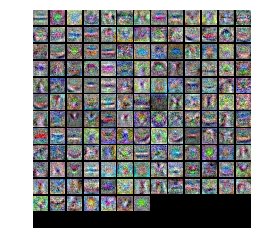

In [44]:
# visualize the weights of the best network
show_net_weights(best_net)

In [52]:
print(max(tuning_parameter_dicts, key=tuning_parameter_dicts.get))
print(max(tuning_parameter_dicts.values()))

best_lr,best_hidden,best_batch_size,best_dropout=max(tuning_parameter_dicts, key=tuning_parameter_dicts.get)

(0.001, 150, 256, 0)
0.507


# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [53]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.497


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$ 1、3

$\color{blue}{\textit Your Explanation:}$ The purpose is to avoid overfitting. option 2 aims to avoid underfitting, so it doesn't apply. 

